<a href="https://colab.research.google.com/github/PaulToronto/IBM---AI-Engineering-Professional-Certificate/blob/main/1_2_1_Lab_1_Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 1 - Simple Linear Regression

## Imports

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn import linear_model
from sklearn.metrics import r2_score

## Objectives

After completing this lab you will be able to:

- Use scikit-learn to implement simple Linear Regression
- Create a model, train it, test it and use the model

## The Data

We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0

In [2]:
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/'
data_url += 'IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/'
data_url += 'labs/Module%202/data/FuelConsumptionCo2.csv'

df = pd.read_csv(data_url)
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [4]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [5]:
# a subset of the data
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


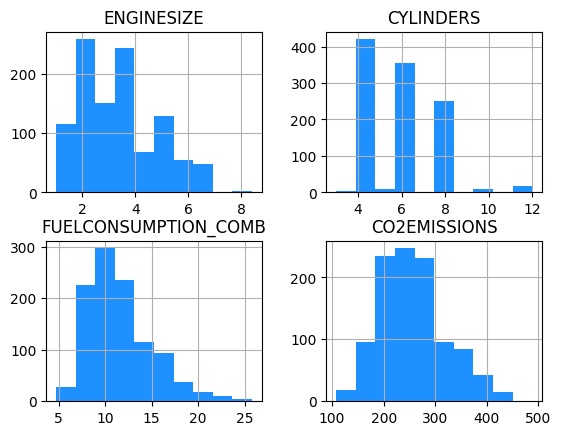

In [6]:
cdf.hist(color='dodgerblue');

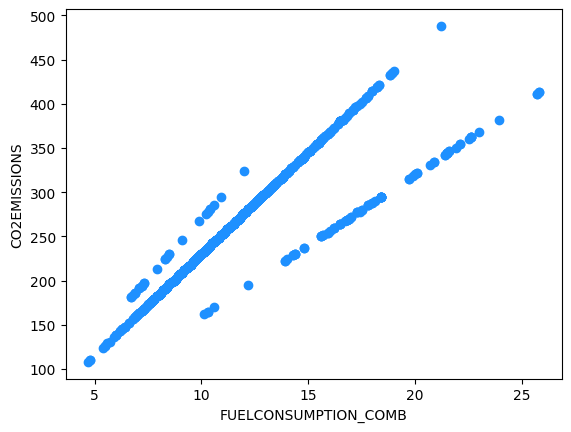

In [7]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color='dodgerblue')
plt.xlabel('FUELCONSUMPTION_COMB')
plt.ylabel('CO2EMISSIONS')
plt.show()

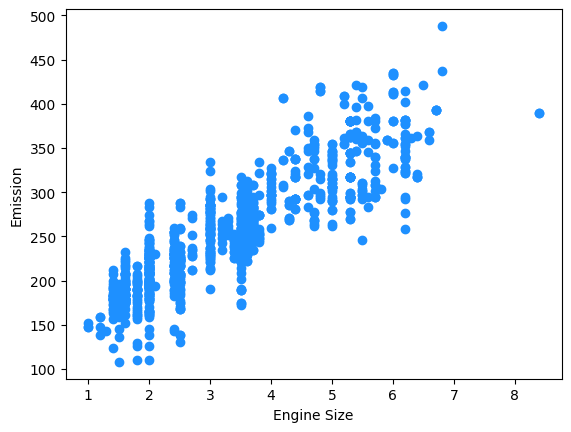

In [8]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='dodgerblue')
plt.xlabel('Engine Size')
plt.ylabel('Emission')
plt.show()

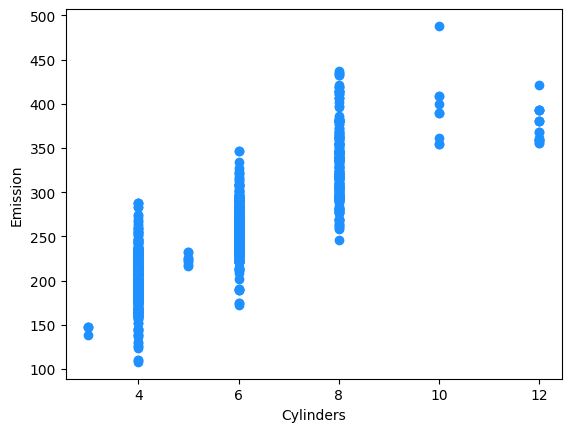

In [9]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='dodgerblue')
plt.xlabel('Cylinders')
plt.ylabel('Emission')
plt.show()

## Create train and test dataset

Train/Test Split involves splitting the dataset into training and testing sets that are mutually exclusive. After which, you train with the training set and test with the testing set.
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the model. Therefore, it gives us a better understanding of how well our model generalizes on new data.

This means that we know the outcome of each data point in the testing dataset, making it great to test with! Since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

Let's split our dataset into train and test sets. 80% of the entire dataset will be used for training and 20% for testing. We create a mask to select random rows using __np.random.rand()__ function:

In [10]:
msk = np.random.rand(len(df)) < 0.8
msk

array([ True,  True,  True, ...,  True, False,  True])

In [11]:
np.unique(msk, return_counts=True)

(array([False,  True]), array([199, 868]))

In [12]:
train = cdf[msk]
test = cdf[~msk]

train.shape, test.shape

((868, 4), (199, 4))

## Train data distribution

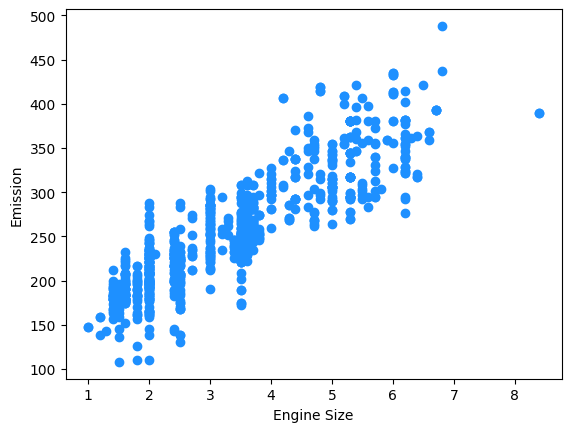

In [13]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='dodgerblue')
plt.xlabel('Engine Size')
plt.ylabel('Emission')
plt.show()

## Modeling

In [14]:
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

In [15]:
train_x[:10], train_y[:10]

(array([[2. ],
        [2.4],
        [1.5],
        [3.5],
        [3.5],
        [3.5],
        [3.5],
        [3.7],
        [3.7],
        [2.4]]),
 array([[196],
        [221],
        [136],
        [255],
        [244],
        [230],
        [232],
        [255],
        [267],
        [225]]))

In [16]:
regr.fit(train_x, train_y)

LinearRegression()

In [17]:
regr.coef_, regr.intercept_

(array([[39.302823]]), array([124.75009388]))

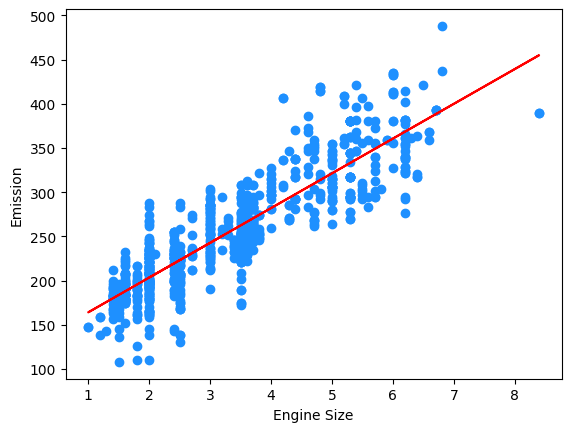

In [18]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='dodgerblue')
plt.plot(train_x, regr.coef_[0][0] * train_x + regr.intercept_[0], '-r')
plt.xlabel('Engine Size')
plt.ylabel('Emission')
plt.show()

## Evaluation

We compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set:
* Mean Absolute Error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.

$$
MAE = \frac{1}{n}\sum_{j=1}^{n}\lvert y_j - \widehat{y}_j\rvert
$$

* Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean Absolute Error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.

$$
MSE = \frac{1}{n}\sum_{i=1}^{n}\left(y_i - \widehat{y}_i\right)^2
$$

* Root Mean Squared Error (RMSE).

$$
RMSE = \sqrt{\frac{1}{n}\sum_{j=1}^{n}\left(y_j - \widehat{y}_j\right)^2}
$$

* R-squared is not an error, but rather a popular metric to measure the performance of your regression model. It represents how close the data points are to the fitted regression line. The higher the R-squared value, the better the model fits your data. The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

$$
R^{2} = 1 - RSE
$$

In [19]:
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

test_x[:10], test_y[:10]

(array([[2.4],
        [3.5],
        [5.9],
        [4.7],
        [4.7],
        [3. ],
        [3. ],
        [4. ],
        [3. ],
        [2. ]]),
 array([[212],
        [239],
        [359],
        [338],
        [354],
        [258],
        [258],
        [288],
        [230],
        [239]]))

In [20]:
pred = regr.predict(test_x)
pred[:10], test_y[:10]

(array([[219.07686907],
        [262.30997437],
        [356.63674956],
        [309.47336196],
        [309.47336196],
        [242.65856287],
        [242.65856287],
        [281.96138586],
        [242.65856287],
        [203.35573987]]),
 array([[212],
        [239],
        [359],
        [338],
        [354],
        [258],
        [258],
        [288],
        [230],
        [239]]))

In [21]:
MAE = np.mean(np.absolute(test_y - pred))
MAE

21.766648892487574

In [22]:
MSE = np.mean((test_y - pred)**2)
MSE

869.0010995094831

In [23]:
r2_score(test_y, pred)

0.739563857527618

$$
RSE = \frac{\sum_{j=1}^{n}\left( y_j - \widehat{y}_j\right)^2}{\sum_{j=1}^{n}\left( y_j - \bar{y}\right)^2} = \frac{RSS}{TSS}
$$
<br>
$$
R^2 = 1 - RSE
$$

In [24]:
# r2_score manual calculation
RSE = np.sum((test_y - pred)**2) / np.sum((test_y - np.mean(test_y))**2)
1 - RSE

0.739563857527618

## Exercise

Lets see what the evaluation metrics are if we trained a regression model using the `FUELCONSUMPTION_COMB` feature.

In [25]:
train_x = train[['FUELCONSUMPTION_COMB']]
test_x = test[['FUELCONSUMPTION_COMB']]

train_x.head(), test_x.head()

(   FUELCONSUMPTION_COMB
 0                   8.5
 1                   9.6
 2                   5.9
 3                  11.1
 4                  10.6,
     FUELCONSUMPTION_COMB
 9                    9.2
 11                  10.4
 13                  15.6
 16                  14.7
 17                  15.4)

In [26]:
regr = linear_model.LinearRegression()

regr.fit(train_x, train_y)

LinearRegression()

In [27]:
predictions = regr.predict(test_x)

In [28]:
MAE = np.mean(np.absolute(test_y - predictions))
MAE

17.88923886431468